<a href="https://colab.research.google.com/github/Dicarvajalb/MetNumUN2021II/blob/main/LAB6/group8MontecarloAreas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration

**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_1^5 x^2 dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

** *texto en cursiva*integrate(x\*\*2)**

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/intX2Wolfram.png" />

**Ejemplo grupal**

$$\int_1^5 x^3 +x^2 dx$$
 

**integrate_{1}^{5}(x\*\*3+\x\*\*2)dx**


<img src="https://raw.githubusercontent.com/Dicarvajalb/MetNumUN2021II/main/LAB6/1.png" />



## Sympy symbolic integration
* integrate https://docs.sympy.org/latest/modules/integrals/integrals.html 
* Symbol https://docs.sympy.org/latest/modules/core.html#symbol
* cos https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* sin https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* pi https://docs.sympy.org/latest/modules/core.html#pi 
* Rational https://docs.sympy.org/latest/modules/core.html#rational 
* evaluate https://docs.sympy.org/latest/modules/evalf.html
* basic operations https://docs.sympy.org/latest/tutorial/basic_operations.html

In [ ]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**2)
print(i)
result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x**3/3
Analytical result: 41.333333333333336


In [ ]:
#Ejemplo grupal

import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**3 + x**2)
print(i)
result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x**4/4 + x**3/3
Analytical result: 197.33333333333334



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom.png" />

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[1,5]$ and evaluate the fucntion $f(x)=x^2$ in ecah random point $f_i = r_i^2$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i = 31/3 = 10.333\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =10.333\cdots$ and $volume(I)=(5-1)$ therefore the estimation integral is 

$$
\int_1^5 x^2 dx \approx volume(I) \times \overline{f} = (5-1) \times 10.33333\cdots = 41.333\cdots
$$ 

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom1.png" />


In [ ]:
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 41.36378844074846


In [ ]:
#ejemplo grupal

import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2 + x**3
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 197.42644260476342


**integrate_{1}^{5}(x\*\*2 * sin(x)\*\*3)dx**

> Indented block



<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram8.jpg" />

**integrate_{1}^{5}(cos(x)dx**

> Indented block



<img src="https://raw.githubusercontent.com/Dicarvajalb/MetNumUN2021II/main/LAB6/2.png" />

In [ ]:
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(x**2 * sympy.sin(x)**3)
print(i)
print(float(i.subs(x, 5) - i.subs(x, 1)))

-x**2*sin(x)**2*cos(x) - 2*x**2*cos(x)**3/3 + 14*x*sin(x)**3/9 + 4*x*sin(x)*cos(x)**2/3 + 14*sin(x)**2*cos(x)/9 + 40*cos(x)**3/27
-15.42978215330555


In [6]:
#Ejemplo grupal
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(sympy.cos(x))
print(i)
print(float(i.subs(x, 5) - i.subs(x, 1)))

sin(x)
-1.800395259471035


In [ ]:
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2 * numpy.sin(x)**3
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -15.163664142986486


In [7]:
#Ejemplo grupal
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum +=numpy.cos(x)
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -1.7973399186188885


# Monte Carlo Area Approximation



![MontecarloAreas.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloAreas.png)

## Polar Curves - Brilliant

* https://brilliant.org/wiki/polar-curves/

![PolarCurvesBrilliant.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesBrilliant.png)

### Area inside of polar curve - UT Calculus

* https://web.ma.utexas.edu/users/m408s/m408d/CurrentWeb/LM10-4-2.php

![IntPolarCurvesUTCalculus.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesUTCalculus.png)


# Plotting and Calculating the Area with Wolfram Alpha 

## polar $r=1−2cos(θ)\cdot3sin(3θ)$, θ in$[0,2pi]$

![](https://drive.google.com/uc?id=1eVXtkYVs-wX6t2YqOMdhSIqnEwIYgZ87)
## $\frac{1}{2} \int_0^{2pi} (1-2cos(θ) \cdot 3sin(3θ))^2 dθ $

![](https://drive.google.com/uc?id=1ZnDJk7HDRiq2tqocK_6TWM3nq8zO6qhL)

##  area under $\frac{1}{2} (1-2cos (t) \cdot 3sin (3t))^ 2$ for $0<t<2pi$

![](https://drive.google.com/uc?id=1ghL5aRcct7WAT5Ai4207Bgk5fFhpJv45)



## $\frac{1}{2} \int(1 - 2cos(θ) \cdot 3sin(3θ))^2 dθ$

![](https://drive.google.com/uc?id=1RYbM8Z7wc6OKyIw9NlyqCwHh53YDBWGQ)

![](https://drive.google.com/uc?id=1XYFfGy1Jn5rTkDog8tCOmFie-t1YFK4P)




**Now the area inside the polar curve** $r= 1- \cos(\theta) \sin(3\theta)$

In [ ]:
from sympy import integrate, Symbol, cos, sin, pi,  Rational

theta = Symbol('theta')
integrate((1- 2*cos(theta)* 3*sin(3*theta))**2)

9*theta*sin(theta)**2*sin(3*theta)**2 + 9*theta*sin(theta)**2*cos(3*theta)**2 + 9*theta*sin(3*theta)**2*cos(theta)**2 + 9*theta*cos(theta)**2*cos(3*theta)**2 + theta + 3*sin(theta)**2*sin(3*theta)*cos(3*theta)/8 + 63*sin(theta)*sin(3*theta)**2*cos(theta)/8 + 3*sin(theta)*sin(3*theta)/2 + 81*sin(theta)*cos(theta)*cos(3*theta)**2/8 - 51*sin(3*theta)*cos(theta)**2*cos(3*theta)/8 + 9*cos(theta)*cos(3*theta)/2

In [ ]:
Rational(1,2) * integrate((1- 2*cos(theta)* 3*sin(3*theta))**2)

9*theta*sin(theta)**2*sin(3*theta)**2/2 + 9*theta*sin(theta)**2*cos(3*theta)**2/2 + 9*theta*sin(3*theta)**2*cos(theta)**2/2 + 9*theta*cos(theta)**2*cos(3*theta)**2/2 + theta/2 + 3*sin(theta)**2*sin(3*theta)*cos(3*theta)/16 + 63*sin(theta)*sin(3*theta)**2*cos(theta)/16 + 3*sin(theta)*sin(3*theta)/4 + 81*sin(theta)*cos(theta)*cos(3*theta)**2/16 - 51*sin(3*theta)*cos(theta)**2*cos(3*theta)/16 + 9*cos(theta)*cos(3*theta)/4

In [ ]:
(Rational(1,2) * integrate((1- 2*cos(theta)* 3*sin(3*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((1- 2*cos(theta)* 3*sin(3*theta))**2)).subs(theta,0)

10*pi

# Scipy numeric integration

* intregrate.quad https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [ ]:
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(1- (math.cos(theta)* math.sin(8*theta)))**2), 0, 2*math.pi)
result

(3.9269908169872414, 1.5518791269403254e-09)

# Monte Carlo area approximation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


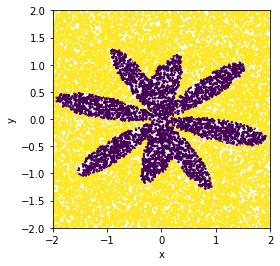

Area approx: 3.978666666666667


In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=15000

count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(8*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(8*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 3.936064


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [ ]:
import matplotlib.pyplot as plt
import numpy 
import math

# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


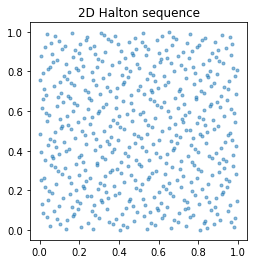

In [ ]:
N = 500
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Area approx: 3.9136


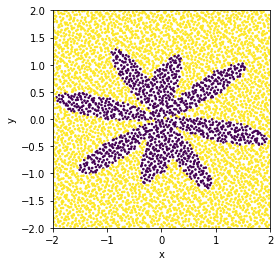

Area approx: 3.9136


In [ ]:
N = 5000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(8*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


In [ ]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(8*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Area approx: 3.926272


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [ ]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 8*sympy.sin(x2)**2 + 0.8 * x3**5 * sympy.sin(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 992.2008537695942


In [ ]:
N = 10_0000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1) + 8*numpy.sin(xx2)**2 + 0.8 * xx3**5 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 977.57356935858


In [ ]:
import math
import numpy
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


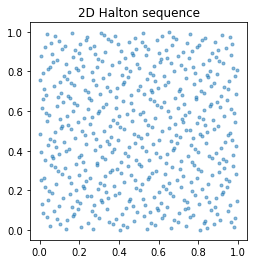

In [ ]:
import matplotlib.pyplot as plt
N = 500
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);

In [ ]:
N = 10_0000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 8*numpy.sin(xx2)**2 + 0.8 * xx3**5 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 992.1989036120232
